# Transformation workflow - protocol using the Opentron  

In [1]:
from python_scripts.info_widgets import save_transformation, create_dropdown_transf, count_rows_numbers
from python_scripts.runner_transformation import TransformationRunner

The complete workflow for the transformation using the Opentron is as following:

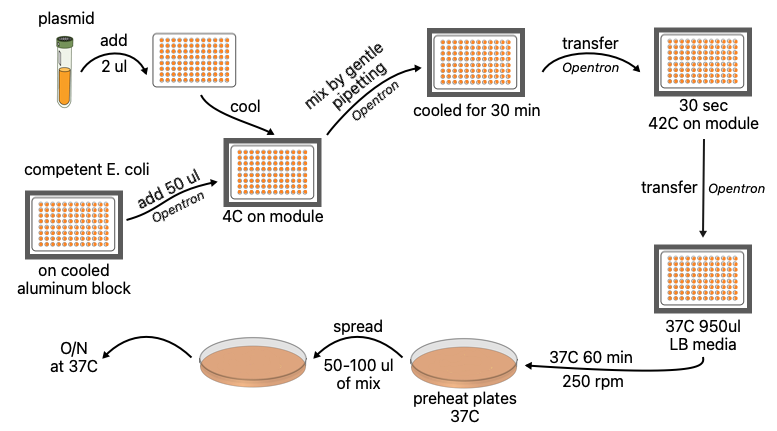

To perform a succesful transformation on *one* Opentrons the following items are necessary:

- Competent *E. coli* cells 
- Plasmid of interest
- LB media (room temp or, preferably, at 37 degrees Celsius)
- Selection plates (37 degrees Celsius)
- 3 96 fully skirted 200ul PCR plates for; competent *E. coli* cells, plasmids of interest and for heat shock
- 1 300ul tip box(es)
- 1 96 deep-well 2ml plates with media
- 1 selection plates with antibiotics
- 2 heating module
- 3 aluminum blocks

How many samples do you have to transform? This number can be higher than the amount of plasmids as the user will have to take into account the number of replicas

In [2]:
dropdown = create_dropdown_transf()

Dropdown(description='Samples:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

What are the names of the plasmid(s) and competent cells used? Write in the boxes and use tab for new entry/name

In [3]:
plasmid_names, competent_cells = save_transformation()

Box(children=(Textarea(value='', description='Plasmid(s):'), Textarea(value='', description='Competent cell(s)…

For the setup on the Opentron, this will look like the following diagram:

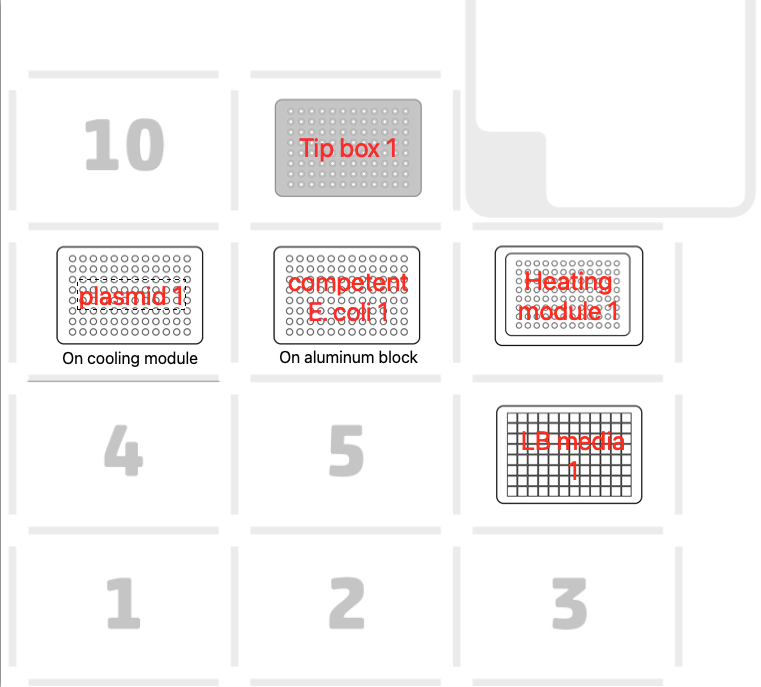

## Preparation before starting the script

Before running the script, the following steps will have to be completed manually:

1. Cooling of 1 aluminium block for a couple of hours (or O/N) in the freezer in a plastic bag to avoid rimming
2. Attaching the two temperature modules with aluminium blocks to the robot to pre-heat and -cool them for more efficient use of time
3. Making of selective LB agar plates ready to be heated for use (these can advantageously be heated simultaneously as the robot is running)
4. Transferring of 50ul aliquotes to 200ul PCR plate that are either placed on ice until use or transferred right before use
5. Transferring of plasmid to 200ul PCR plate that are either placed on ice until use or transferred right before use
6. Preparing deep-well plate with 950ul LB media

When you are ready to initiate the script on the robots i.e. you have attached the necessary heating modules, you can start the script and wait for the robot the heat/cool the modules to the desired temperatures while preparing the rest. Do not place cold aluminum blocks with E. coli samples before this. 

### Initiate the robot:

In [ ]:
## insures that robot is correctly initialized - Without this the robot will prioritize its own GUI
!systemctl stop opentrons-robot-server

In [ ]:
#Preparing the dynamic variables for the run
script = TransformationRunner.get_script()

c_num, r_num = count_rows_numbers(dropdown.value)[0],count_rows_numbers(dropdown.value)[1]

script.columns = c_num
script.rows = r_num

In [ ]:
import opentrons.execute

# This is where you establish the API version 
protocol = opentrons.execute.get_protocol_api('2.4')

In [ ]:
# It is important to always home before and after the run of a script
runner = TransformationRunner(cols=c_num, rows=r_num)

#protocol.home()

#script.run(protocol)

#protocol.home()

runner.finished()


In [ ]:
try:
    runner.display_form(plasmids = plasmid_names.value,
                        competent_cells = competent_cells.value, 
                        samples = dropdown.value)
    
except Exception as error:
    print(error)        

And now you have succesfully run the transformation step on the Opentron and can spread the mix on selection plates for O/N incubation at 37 degrees Celsius.